Hill Climbing
=======

# Theory

## Definition


## Examples


# Implementation


## Imports

In [2]:
import matplotlib
import numpy as np
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
matplotlib.rcParams['animation.embed_limit'] = 2**128

## Parameters

In [3]:
# No general Parameters

## Algorithm


In [18]:
def HC(cost_func: Callable, get_neighborhood: Callable, x_0: float, maxiter: int = int(5e4), task: str = "minimization") -> tuple[float, list, int]:


    # algorithm data
    x = [x_0]
    cost = [cost_func(x_0)]

    for _ in range(maxiter-1):
        
        # select the best neighbor
        neighbors = get_neighborhood(x[-1])
        best_neighbor = neighbors[ cost_func(neighbors).argsort()[0] ]

        # accept if neighbor is better
        if cost_func(best_neighbor) < cost_func(x[-1]):
            x.append(best_neighbor)
            cost.append(cost_func(best_neighbor))

        # terminate if neighbor is worse
        if cost_func(best_neighbor) > cost_func(x[-1]):
            break
        
    
    x_optimal, moves, history= x[-1], len(x), pd.DataFrame({"cost": cost, "x": x})

    return x_optimal, moves, history

## Results Visualization

In [19]:
x_optimal, moves, history = HC(cost_func, get_neighborhood, x_0)

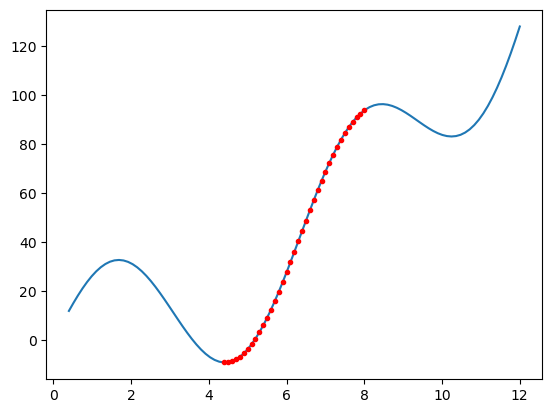

In [20]:
xx = np.linspace(history["x"].min()-4, history["x"].max()+4, num=100)


plt.plot(xx, cost_func(xx))
plt.plot(history["x"], history["cost"], 'r.')